In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("mall.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop(columns = ['CustomerID', 'Genre'])

In [5]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
x = df.iloc[:, [0,1]].values

In [7]:
from sklearn.cluster import KMeans

In [8]:
import matplotlib.pyplot as plt

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

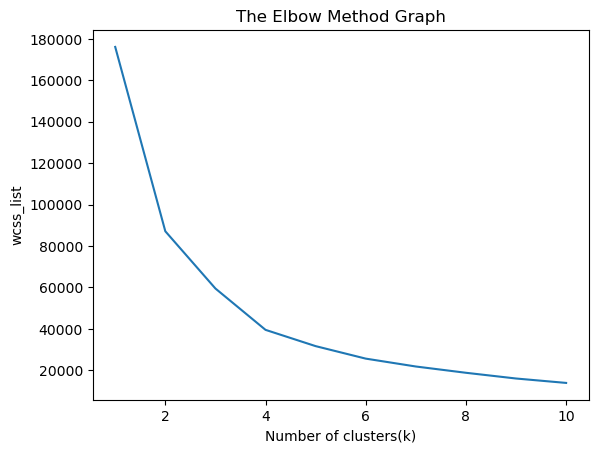

In [11]:
a=[]
for i in range(1,11):
    b = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    b.fit(x)
    a.append(b.inertia_)
plt.plot(range(1,11), a)

plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')

plt.show()

# From thr abovce plot, we can see the elbow point is at 4. So the number of clusters here will be 4.

In [15]:
b = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_predict=b.fit_predict(x)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


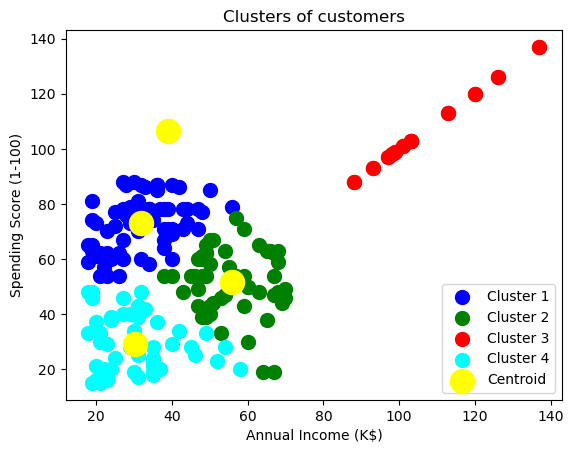

In [17]:
# Visualizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label = 'Cluster 2')
plt.scatter(x[y_predict == 2, 1], x[y_predict == 2, 1], s=100, c='red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label = 'Cluster 4')

plt.scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1], s=300, c='yellow',
           label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()